# MLR

import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\anura\Desktop\d\MLR\MLR\ToyotaCorolla - MLR.csv") #loading the dataset
df

In [6]:
df.shape #knowing how many rows and columns

(1436, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [8]:
print(df.isnull().sum()) #finding the null values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [9]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

### EDA(exploratary data analysis)

In [10]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [11]:
import matplotlib.pyplot as plt

In [12]:
df["Fuel_Type"].value_counts() 

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

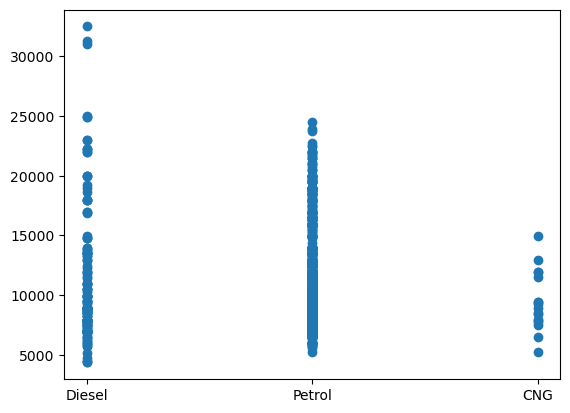

In [13]:
plt.scatter(x =df["Fuel_Type"], y =df["Price"])
plt.show()

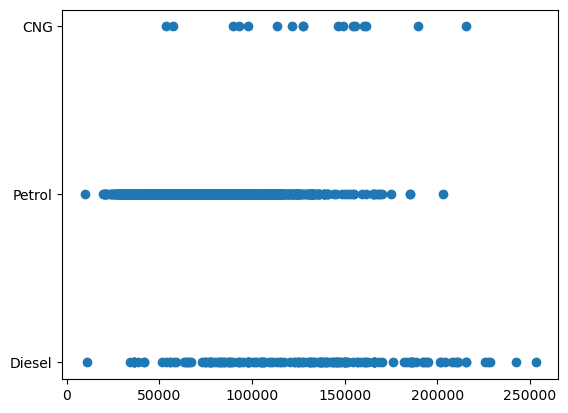

In [14]:
df["Combined_X"] = df["Price"] + df["KM"]+ df["HP"]+ df["Age_08_04"]+ df["Automatic"] + df["cc"]+ df["Doors"] + df["Cylinders"]+df["Gears"]+df["Weight"]
plt.scatter(x=df["Combined_X"], y=df["Fuel_Type"])
plt.show()


Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64


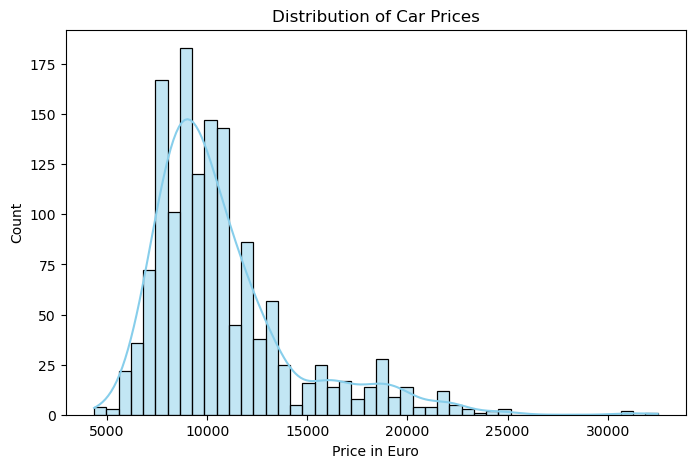

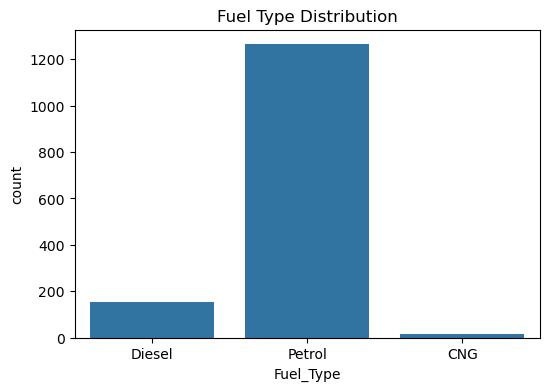

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Fuel Types
print(df['Fuel_Type'].value_counts())

# Plot distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], kde=True, color="skyblue")
plt.title("Distribution of Car Prices")
plt.xlabel("Price in Euro")
plt.show()

# Fuel Type count
plt.figure(figsize=(6, 4))
sns.countplot(x='Fuel_Type', data=df)
plt.title("Fuel Type Distribution")
plt.show()


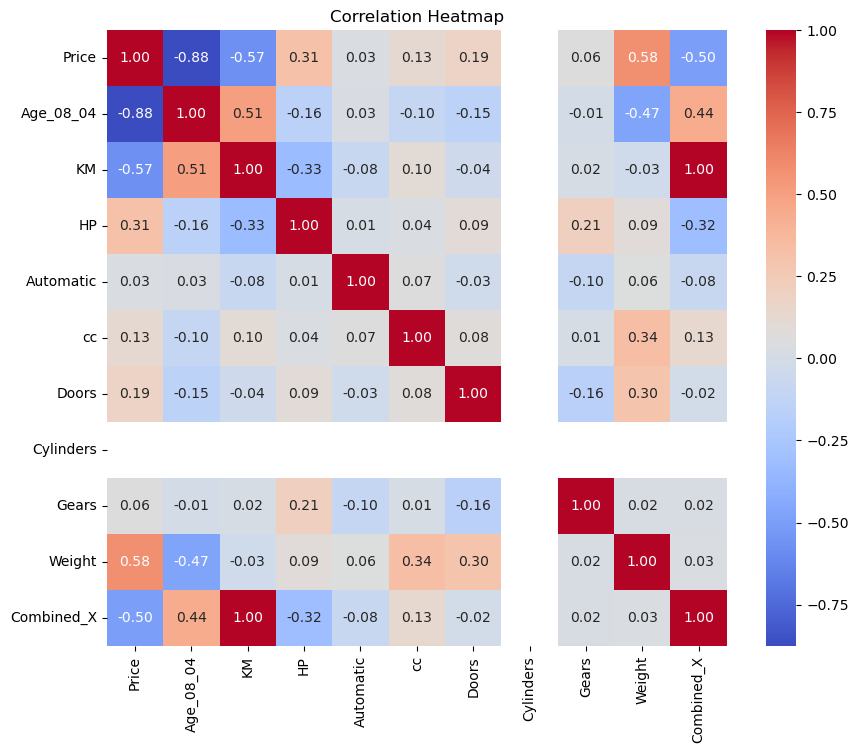

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


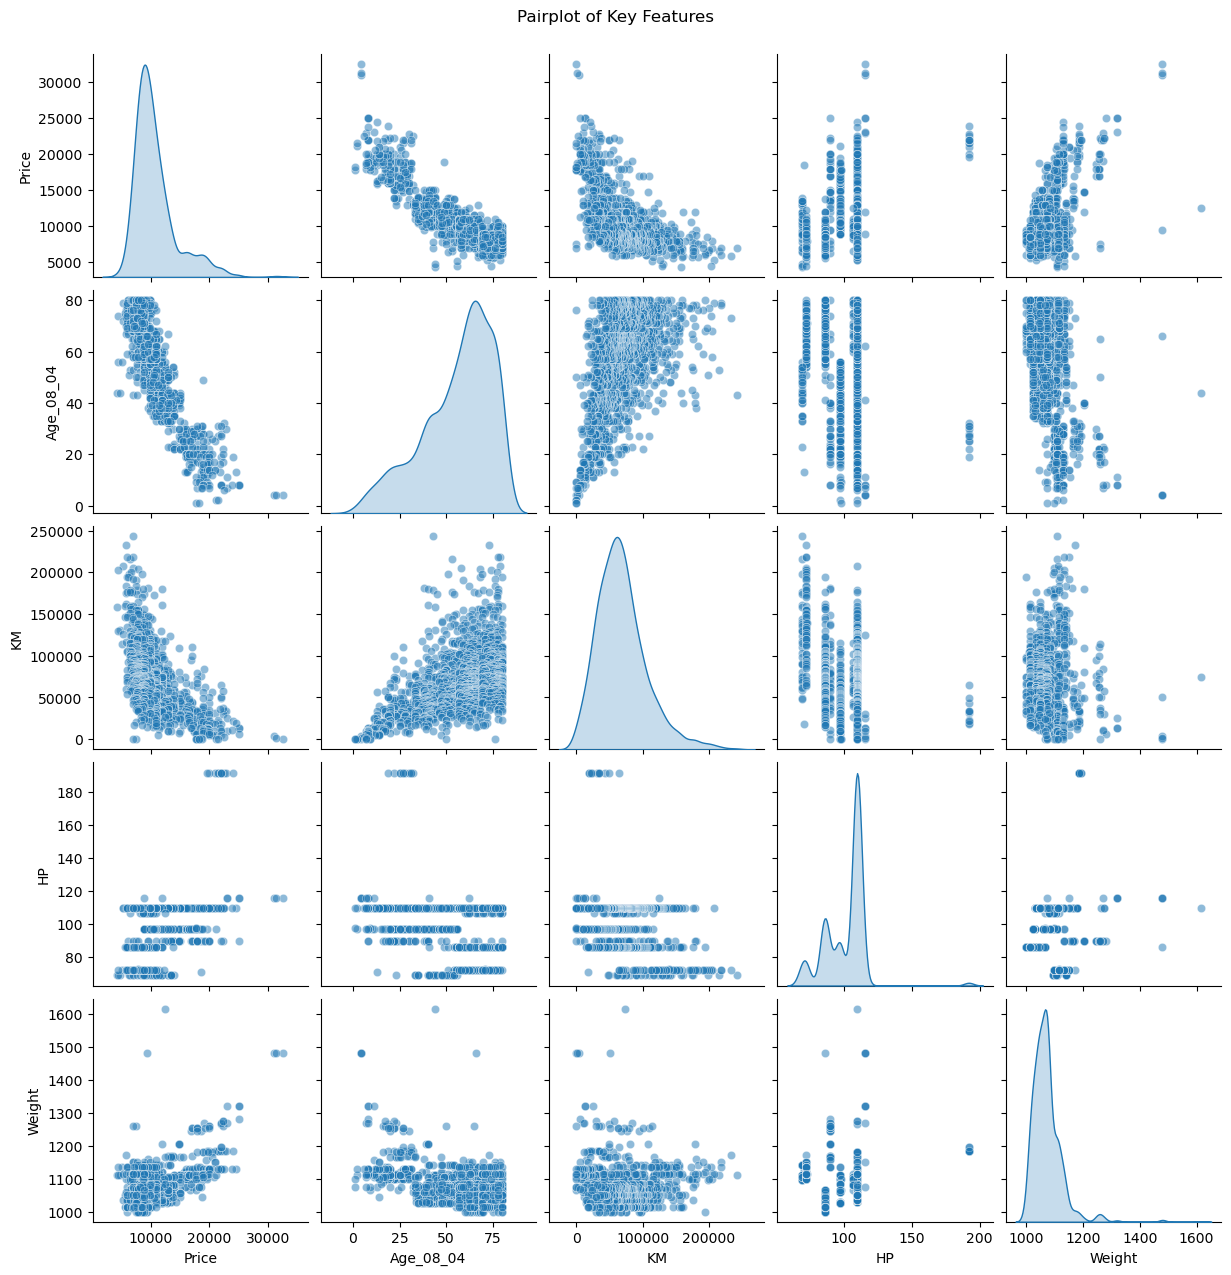

In [19]:
selected_cols = ["Price", "Age_08_04", "KM", "HP", "Weight"]
sns.pairplot(df[selected_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

In [21]:
#Data Transformation
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
df["Fuel_Type"]=LE.fit_transform(df["Fuel_Type"])
Y=df["Price"] #target varaible

In [22]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Combined_X
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,-0.496229
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,0.441742
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.996133
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303,-0.448909
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.318196
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.081906
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.133354
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,-0.017855
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,0.022533


### Insights

In [23]:
print('''
Fuel Type Distribution
The majority of cars are Petrol, followed by Diesel, and very few CNG.
This will be important when we encode categorical variables for modeling.
All the cars have 4 cylinders
Correlation Insights
Price is:

Negatively correlated with Age (older cars are cheaper).

Positively correlated with HP, Weight, and cc (more powerful/heavy cars are pricier).

Slightly positively correlated with Automatic (automatic cars may be costlier, although rare)''')


Fuel Type Distribution
The majority of cars are Petrol, followed by Diesel, and very few CNG.
This will be important when we encode categorical variables for modeling.
All the cars have 4 cylinders
Correlation Insights
Price is:

Negatively correlated with Age (older cars are cheaper).

Positively correlated with HP, Weight, and cc (more powerful/heavy cars are pricier).

Slightly positively correlated with Automatic (automatic cars may be costlier, although rare)


In [2]:
#Data partition
#1.B0 + B1[Age_08_04]
#2.B0 + B1[Age_08_04]+B2[KM]
#3.B0 + B1[Age_08_04] + B2[KM] +B3[HP]
#4.B0 + B1[Age_08_04] + B2[KM] + B3[HP]+B4[Doors]
#5.B0 + B1[Age_08_04] + B2[KM] + B3[HP] +B4[Doors]+B5[cc]
#6.B0 + B1[Age_08_04] + B2[KM] + B3[HP] +B4[Doors] + B5[cc]+B6[Gears]
#7.B0 + B1[Age_08_04] + B2[KM] + B3[HP] +B4[Doors] + B5[cc] + B6[Gears]+B7[Fuel_Type]
#8.B0 + B1[Price] + B2[Age_08_04] + B3[KM] + B4[HP] +B5[Doors] + B6[cc] + B7[Gears] + B8[Fuel_Type]

In [81]:
#Data partition
Y =df["Price"]


#M1
X1 =df[["Age_08_04"]]

#M2
X2 =df[["Age_08_04","KM"]]

#M3
X3 =df[["Age_08_04","KM","HP"]]

#M8
X =df[["KM","HP","Doors","cc","Gears","Fuel_Type","Weight"]]


In [82]:
#Model fitting
from sklearn.linear_model import LinearRegression 
model =LinearRegression()
model.fit(X,Y)

LinearRegression()

In [83]:
#Bias -B0 
model.intercept_


-33403.991482598765

In [84]:
#Coffcient - B1
model.coef_

array([-5.07963183e-02,  1.92908492e+01, -1.66448750e+01, -9.81003976e-02,
        8.05500401e+02,  3.58235568e+01,  3.89423227e+01])

In [85]:
df["Y_pred"] =model.predict(X)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Combined_X,Y_pred
0,13500,23,46986,1,90,0,2000,3,4,5,1165,63776,15130.465191
1,13750,23,72937,1,90,0,2000,3,4,5,1165,89977,13812.249933
2,13950,24,41711,1,90,0,2000,3,4,5,1165,58952,15398.415770
3,14950,26,48000,1,90,0,2000,3,4,5,1165,66243,15078.957724
4,13750,30,38500,1,90,0,2000,3,4,5,1170,55552,15756.234362
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025,30536,11049.026704
1432,10845,72,19000,2,86,0,1300,3,4,5,1015,32330,10738.032993
1433,8500,71,17016,2,86,0,1300,3,4,5,1015,28000,10838.812888
1434,7250,70,16916,2,86,0,1300,3,4,5,1015,26649,10843.892520


In [86]:
#Metrics 
from sklearn.metrics import mean_squared_error,r2_score 
mse =mean_squared_error(Y, df["Y_pred"])
print("Mean Squared error:", np.round(mse, 2))

Rmse =mean_squared_error(Y, df["Y_pred"], squared =False)
print("Root Mean Squared Error:", np.round(Rmse, 2))

R2 =r2_score(Y, df["Y_pred"])
print("Rsquare:", np.round(R2, 2))

Mean Squared error: 4557835.11
Root Mean Squared Error: 2134.91
Rsquare: 0.65


C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Variance Inflationn Factor(VIF)

In [87]:
#VIF calculation for multicollinearity 
#
Y =df["Price"]
X1 =df[["HP"]]

In [88]:
#model fittinf 
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(X1, Y)

LinearRegression()

In [89]:
df['Y_pred'] =model.predict(X1)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Combined_X,Y_pred
0,13500,23,46986,1,90,0,2000,3,4,5,1165,63776,9853.675333
1,13750,23,72937,1,90,0,2000,3,4,5,1165,89977,9853.675333
2,13950,24,41711,1,90,0,2000,3,4,5,1165,58952,9853.675333
3,14950,26,48000,1,90,0,2000,3,4,5,1165,66243,9853.675333
4,13750,30,38500,1,90,0,2000,3,4,5,1170,55552,9853.675333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025,30536,9548.635381
1432,10845,72,19000,2,86,0,1300,3,4,5,1015,32330,9548.635381
1433,8500,71,17016,2,86,0,1300,3,4,5,1015,28000,9548.635381
1434,7250,70,16916,2,86,0,1300,3,4,5,1015,26649,9548.635381


In [90]:
R2 =r2_score(Y, df['Y_pred'])
VIF =1/(1 - R2)
print("VIF:", np.round(VIF, 2))

VIF: 1.11


In [91]:
#  less than 5 means Moderate multicollinearity (usually acceptable)

In [92]:
# 
Y =df["Price"]
X2 =df[["HP","Weight"]]

#model fitting 
from sklearn.linear_model import LinearRegression 
model =LinearRegression() 
model.fit(X2,Y)

df["Y_pred"] =model.predict(X2)
R2 =r2_score(Y, df["Y_pred"])
VIF =1/(1 - R2) 
print("VIF:", np.round(VIF, 2))

VIF: 1.69


In [93]:
#
Y =df["Price"]
X3 =df[["cc","Weight","HP"]]

#model fitting 
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(X3, Y)

df['Y_pred'] =model.predict(X3)
R2 =r2_score(Y, df['Y_pred'])
VIF =1/(1 - R2)
print("VIF:", np.round(VIF, 2))

VIF: 1.7


In [94]:
#Data partition 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size =0.2,random_state =100)
# shuffle split 
training_error =[]
test_error =[]

for i in range(1, 101):
    X_train,X_test,Y_train,Y_test =train_test_split(X, Y, test_size =0.2, random_state =i)
    model.fit(X_train, Y_train)
    y_pred_train =model.predict(X_train)
    y_pred_test =model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train, y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test, y_pred_test)))

print("cross validation :Training error:", np.round(np.mean(training_error),2))
print("cross validation :Test error:", np.round(np.mean(test_error),2))

cross validation :Training error: 2130.85
cross validation :Test error: 2282.33


In [98]:
from sklearn.linear_model import Lasso,Ridge
model =Lasso(alpha =10)
model.fit(X_train, Y_train)

Lasso(alpha=10)

In [99]:
lr =model.coef_
lr

array([-5.09931369e-02,  2.03586790e+01, -2.15447129e+01, -1.10107175e-01,
        5.18867421e+02,  2.59450944e+02,  4.17582233e+01])

In [106]:
lass_1 =pd.DataFrame(model.coef_)
lass_1

,0
0,-0.050993
1,20.358679
2,-21.544713
3,-0.110107
4,518.867421
5,259.450944
6,41.758223


In [101]:
ridge = Ridge(alpha=1.0) #ridge 
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)

In [105]:
rr=ridge.coef_
rr

array([-5.05876122e-02,  1.80260085e+01, -3.14220377e+01, -1.01778770e-01,
        7.78986288e+02,  4.36639574e+02,  4.25038776e+01])

### Interview Questions:

In [2]:
#1.What is Normalization & Standardization and how is it helpful?
print('''
--> To make our data in to our convienience 
--->Normalization (OR) Scaling :It will removes the units and adjust the data in between {0 to 1}.
--->Standardization :Transforming from the its original location to some where in between {-3 to +3}.
''')


--> To make our data in to our convienience 
--->Normalization (OR) Scaling :It will removes the units and adjust the data in between {0 to 1}.
--->Standardization :Transforming from the its original location to some where in between {-3 to +3}.



In [3]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?
print('''
1.If two x variable are highly correlated among them rather than with y variable then multicollinearity issues exists.
2.Finally, we have select that a model should have least RMSE and highest R square with no multicollinearity issues with minimum number of variables.
3.multicollinearity is very common issues will be there any kind of continoues variables in any types of datasets.
4.Do we have any specific range to decide that how much of multicollinearity can be accepted.
5.We have some other measure called VIF 
--->Variance inflation factor(VIF) =1/(1 - R2)
''')


1.If two x variable are highly correlated among them rather than with y variable then multicollinearity issues exists.
2.Finally, we have select that a model should have least RMSE and highest R square with no multicollinearity issues with minimum number of variables.
3.multicollinearity is very common issues will be there any kind of continoues variables in any types of datasets.
4.Do we have any specific range to decide that how much of multicollinearity can be accepted.
5.We have some other measure called VIF 
--->Variance inflation factor(VIF) =1/(1 - R2)

